[View in Colaboratory](https://colab.research.google.com/github/redcican/Machine-Learning-Basic/blob/master/Gaussian_Processes_Regression_Simple_Examples.ipynb)

A simple one-dimensional regression example computed in two different ways:
* A noise-free case
* A noisy case with known noise-level per datapoint

In both cases, the kernel's parameters are estimated using the maximum likelihood principle.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)

In [0]:
def f(x):
  """The function to predict"""
  return x * np.cos(x)

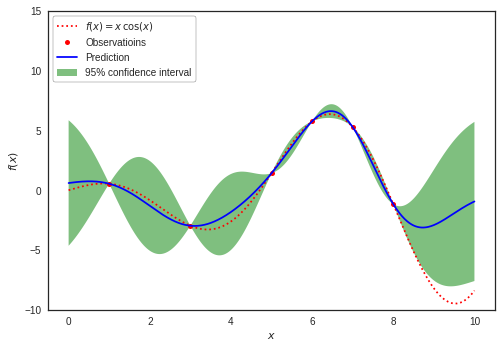

In [5]:
# First the noiseless case
X = np.atleast_2d([1., 3.,5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluation of the real function, the prediction and its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10,(1e-2,1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum likelibhhod of the parameters
gp.fit(X,y)

# Make the prediction on the meshed x-axis
y_pred, sigma = gp.predict(x, return_std=True)

# plot the function, the prediction and the 95% confidence interval based on the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\, \cos(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observatioins')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x,x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 *sigma)[::-1]]),
        alpha=.5, fc='g',ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10,15)
plt.legend(loc='upper left',frameon=True,edgecolor='black')

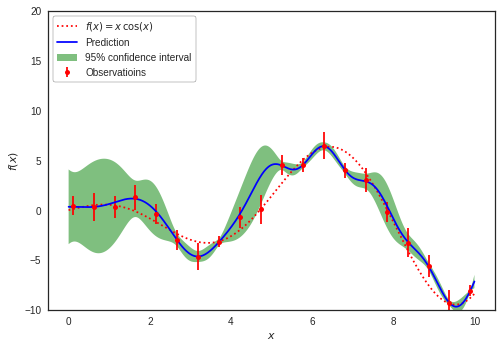

In [59]:
# The noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0*np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instanciate a GP model
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy/y)**2,
                             n_restarts_optimizer=10)

gp.fit(X,y)

y_pred, sigma = gp.predict(x, return_std=True)

# plot the function, the prediction and the 95% confidence interval based on the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\, \cos(x)$')
plt.errorbar(X.ravel(), y,dy, fmt='r.', markersize=10, label=u'Observatioins')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x,x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 *sigma)[::-1]]),
        alpha=.5, fc='g',ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10,20)
plt.legend(loc='upper left',frameon=True,edgecolor='black')

plt.show()